# SapuJagat - JagatScan
## Deteksi Jenis Sampah Menggunakan YOLOv8

### Dibuat oleh:
- Nama     : Muhammad Rizki Putra, Nadia Alzena Zahrani, Siti Arfah Hamidah
- Instansi : Universitas Padjadjaran, Universitas Brawijaya, Institut Pendidikan Garut
- Tanggal  : 13/06/2025

---

## Tujuan
- Membuat model deteksi objek untuk klasifikasi jenis sampah.
- Implementasi YOLOv8 untuk mendukung sistem JagatScan.
- Mempersiapkan model untuk integrasi ke aplikasi berbasis web.

---

## Dataset
Dataset terdiri dari beberapa kategori sampah:
- Daun
- Kaca
- Karet
- Kayu
- Kertas
- Logam
- Plastik
- Styrofoam
- Tekstil
- Sisa Makanan

---

## Teknologi
- [Roboflow](https://app.roboflow.com/cc25cf145/sapujagat) (untuk pembuatan dataset serta preprocessing)
- Python (Google Colab)
- YOLOv8 (Ultralytics)
- TensorFlow.js (untuk deployment web)

---

## Alur Proyek
1. Persiapan Dataset
2. Training Model YOLOv8
3. Evaluasi Model
4. Inference Model
5. Export Model ke TensorFlow.js

---

## Export Model
Model dapat diekspor ke:
- `best_saved_model/` → untuk TensorFlow SavedModel
- `best_web_model/` → untuk TensorFlow.js (frontend)

---

## Contoh Prediksi
- Input: Gambar objek sampah
- Output: Bounding Box + Label + Confidence

---

## Lisensi
Proyek ini menggunakan lisensi [MIT](LICENSE)


# Install Libraries

In [1]:
!nvidia-smi
!pip install roboflow
!pip install ultralytics

Fri Jun 13 07:08:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Import Library

In [2]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import Image

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.7/112.6 GB disk)


# Data loading

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="PKpcGmbYZkw68ZTHLcoa")
project = rf.workspace("cc25cf145").project("sapujagat")
version = project.version(8)
dataset = version.download("yolov8")
dataset.location

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SapuJagat-8 in yolov8:: 100%|██████████| 11342/11342 [00:02<00:00, 4429.47it/s]


'/content/SapuJagat-8'

# Pembuatan model

Berikut adalah penjelasan lengkap dari parameter yang digunakan pada proses training model YOLOv8:

| Parameter        | Deskripsi                                                                                   |
|------------------|---------------------------------------------------------------------------------------------|
| `YOLO('yolov8s.pt')` | Memuat model YOLOv8 versi **small** (`s`) dengan bobot pre-trained dari Ultralytics. Cocok untuk balancing antara akurasi dan kecepatan. |
| `data`           | Path ke file **`data.yaml`** yang berisi konfigurasi dataset, termasuk lokasi gambar, label, dan daftar nama kelas. |
| `epochs`         | Jumlah **epoch** atau iterasi penuh terhadap seluruh dataset selama proses training. Semakin besar → potensi akurasi meningkat, tapi waktu training bertambah. |
| `imgsz`          | **Ukuran gambar** input. Semua gambar akan di-resize menjadi resolusi **640x640 piksel** sebelum masuk ke model. |
| `lr0`            | **Learning rate awal**. Mengatur seberapa besar perubahan bobot pada setiap iterasi training. Nilai terlalu besar → training bisa tidak stabil; terlalu kecil → training lambat. |
| `batch`          | Jumlah gambar yang diproses dalam satu batch selama training. Semakin besar batch → semakin efisien (jika hardware mendukung), tapi butuh memori lebih banyak. |
| `warmup_epochs`  | Jumlah epoch awal untuk **warmup**. Warmup digunakan agar model belajar secara perlahan sebelum masuk ke learning rate normal → mencegah model learning terlalu cepat di awal yang bisa menyebabkan overfitting atau loss tidak stabil. |

In [9]:
model = YOLO('yolov8s.pt')

model.train(
    data=dataset.location + '/data.yaml',
    epochs=20,
    imgsz=640,
    lr0=0.01,
    batch=16,
    warmup_epochs=3,
)

model.val()

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/SapuJagat-8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

train: Scanning /content/SapuJagat-8/train/labels.cache... 5031 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5031/5031 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 195, len(boxes) = 7051. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 437.8±159.5 MB/s, size: 72.8 KB)


val: Scanning /content/SapuJagat-8/valid/labels.cache... 351 images, 0 backgrounds, 0 corrupt: 100%|██████████| 351/351 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 450. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.56G      1.276      2.649      1.686         22        640: 100%|██████████| 315/315 [01:45<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.31it/s]

                   all        351        450      0.521      0.517      0.538      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.56G       1.29      1.892      1.669         26        640: 100%|██████████| 315/315 [01:41<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        351        450      0.478      0.495      0.491      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.56G       1.31      1.846      1.682         19        640: 100%|██████████| 315/315 [01:39<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        351        450      0.532      0.541      0.545      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.59G      1.265      1.743      1.651         26        640: 100%|██████████| 315/315 [01:39<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.68it/s]

                   all        351        450       0.53      0.528      0.561      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.59G      1.225      1.612      1.612         15        640: 100%|██████████| 315/315 [01:38<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]

                   all        351        450      0.595      0.563       0.61      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.59G      1.167      1.509      1.573         24        640: 100%|██████████| 315/315 [01:38<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.54it/s]

                   all        351        450      0.663      0.651      0.691      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.59G      1.134      1.393       1.55         19        640: 100%|██████████| 315/315 [01:38<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.72it/s]

                   all        351        450      0.618       0.64      0.648      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.63G      1.121      1.352      1.528         17        640: 100%|██████████| 315/315 [01:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.20it/s]

                   all        351        450      0.686      0.608      0.651      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.67G      1.086      1.265      1.514         16        640: 100%|██████████| 315/315 [01:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.16it/s]

                   all        351        450      0.718      0.672      0.729      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.67G      1.052       1.18      1.478         28        640: 100%|██████████| 315/315 [01:39<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]

                   all        351        450       0.71      0.689      0.732      0.494


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.67G      1.041      1.065      1.612          7        640: 100%|██████████| 315/315 [01:37<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.06it/s]

                   all        351        450      0.758      0.717      0.769       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.67G     0.9833      0.938      1.554          9        640: 100%|██████████| 315/315 [01:35<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]

                   all        351        450      0.765      0.685      0.775       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.67G     0.9499     0.8674      1.519          7        640: 100%|██████████| 315/315 [01:35<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.24it/s]

                   all        351        450      0.766      0.712      0.806      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       4.7G     0.9274     0.7942      1.493          8        640: 100%|██████████| 315/315 [01:37<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.04it/s]

                   all        351        450       0.73      0.704      0.757      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.72G     0.8896     0.7247      1.459          8        640: 100%|██████████| 315/315 [01:37<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.71it/s]

                   all        351        450      0.798       0.73      0.787      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.72G     0.8613     0.6869      1.432         11        640: 100%|██████████| 315/315 [01:35<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.15it/s]

                   all        351        450      0.822      0.694      0.776      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.72G     0.8311     0.6187      1.401         15        640: 100%|██████████| 315/315 [01:33<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]

                   all        351        450       0.81      0.737      0.795      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.72G     0.8055     0.5792      1.373         10        640: 100%|██████████| 315/315 [01:32<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.16it/s]

                   all        351        450      0.803       0.71      0.783      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.72G     0.7745     0.5328      1.352          7        640: 100%|██████████| 315/315 [01:33<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]

                   all        351        450      0.814      0.736      0.811      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.72G     0.7483      0.512      1.317         11        640: 100%|██████████| 315/315 [01:33<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]

                   all        351        450      0.802      0.733      0.812      0.594



20 epochs completed in 0.566 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 22.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.67it/s]


                   all        351        450      0.802      0.733      0.812      0.594
                  Daun         45         82       0.84      0.695      0.783      0.444
                  Kaca         19         19       0.68      0.947      0.842       0.65
                 Karet         25         26      0.681      0.656      0.747      0.565
                  Kayu         21         26      0.893      0.654      0.796      0.424
                Kertas         54         80      0.884      0.573       0.81      0.692
                 Logam         24         29      0.781      0.483      0.591      0.445
               Plastik         51         72      0.714      0.847      0.836      0.681
             Styrofoam         49         51      0.894      0.941      0.963      0.835
               Tekstil         29         29      0.873      0.931      0.962      0.805
           sisaMakanan         35         36      0.784      0.604      0.785      0.399
Speed: 0.2ms preproce

val: Scanning /content/SapuJagat-8/valid/labels.cache... 351 images, 0 backgrounds, 0 corrupt: 100%|██████████| 351/351 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 450. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.61it/s]


                   all        351        450      0.808       0.73      0.811      0.594
                  Daun         45         82      0.828      0.683      0.775      0.444
                  Kaca         19         19      0.681      0.947      0.842      0.648
                 Karet         25         26      0.681      0.654      0.747      0.569
                  Kayu         21         26      0.944      0.646      0.797      0.424
                Kertas         54         80      0.884      0.572       0.81      0.691
                 Logam         24         29      0.786      0.483      0.591      0.445
               Plastik         51         72      0.722      0.847      0.837      0.682
             Styrofoam         49         51      0.895      0.941      0.964       0.84
               Tekstil         29         29      0.876      0.931      0.962      0.805
           sisaMakanan         35         36      0.782      0.596      0.786      0.396
Speed: 0.7ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78fcf5c6a010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

## 📊 Hasil Evaluasi Model

### 🔧 Model Summary
- **Jumlah Layers**: 72
- **Jumlah Parameter**: 11,129,454
- **Gradien**: 0 (sudah fused/optimized)
- **GFLOPs (Floating Point Operations)**: 28.5 → menunjukkan kompleksitas komputasi model

---

### 🏷️ Evaluasi Performa (Validation Results)

| **Metrik**     | **Deskripsi**                                                                                 |
|----------------|-----------------------------------------------------------------------------------------------|
| **P (Precision)** | Kemampuan model mendeteksi objek dengan benar (minim false positive).                       |
| **R (Recall)**    | Kemampuan model menemukan semua objek yang ada (minim false negative).                      |
| **mAP50**         | **Mean Average Precision @IoU 0.5**. Semakin tinggi → semakin baik performa deteksi.        |
| **mAP50-95**      | Rata-rata **mAP** pada variasi IoU 0.5 sampai 0.95 → metrik yang lebih ketat dan akurat.   |

---

### 📁 Ringkasan Hasil

| **Kelas**        | **Precision (P)** | **Recall (R)** | **mAP50** | **mAP50-95** |
|------------------|------------------:|---------------:|----------:|-------------:|
| **all**          |            0.802  |         0.733  |     0.812 |        0.594 |
| Daun             |            0.840  |         0.695  |     0.783 |        0.444 |
| Kaca             |            0.680  |         0.947  |     0.842 |        0.650 |
| Karet            |            0.681  |         0.656  |     0.747 |        0.565 |
| Kayu             |            0.893  |         0.654  |     0.796 |        0.424 |
| Kertas           |            0.884  |         0.573  |     0.810 |        0.692 |
| Logam            |            0.781  |         0.483  |     0.591 |        0.445 |
| Plastik          |            0.714  |         0.847  |     0.836 |        0.681 |
| Styrofoam        |            0.894  |         0.941  |     0.963 |        0.835 |
| Tekstil          |            0.873  |         0.931  |     0.962 |        0.805 |
| sisaMakanan      |            0.784  |         0.604  |     0.785 |        0.399 |

---

### ⚡ Kecepatan Inference

| Tahap         | Waktu per Gambar |
|---------------|------------------|
| **Preprocess**   | 0.2 ms          |
| **Inference**    | 4.7 ms          |
| **Loss**         | 0.0 ms          |
| **Postprocess**  | 4.6 ms          |

⏱️ **Total waktu prediksi per gambar ≈ 9.5 ms**

---

### 📌 Insight
- **Kelas dengan mAP tertinggi**: `Styrofoam`, `Tekstil`
- **Kelas yang perlu perbaikan**: `sisaMakanan`, `Kayu` → kemungkinan butuh lebih banyak data atau augmentasi lebih baik


In [11]:
model = YOLO('/content/runs/detect/train5/weights/best.pt')

# Melakukan Inference gambar


image 1/1 /content/dn2.png: 640x640 13 Dauns, 25.2ms
Speed: 10.1ms preprocess, 25.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


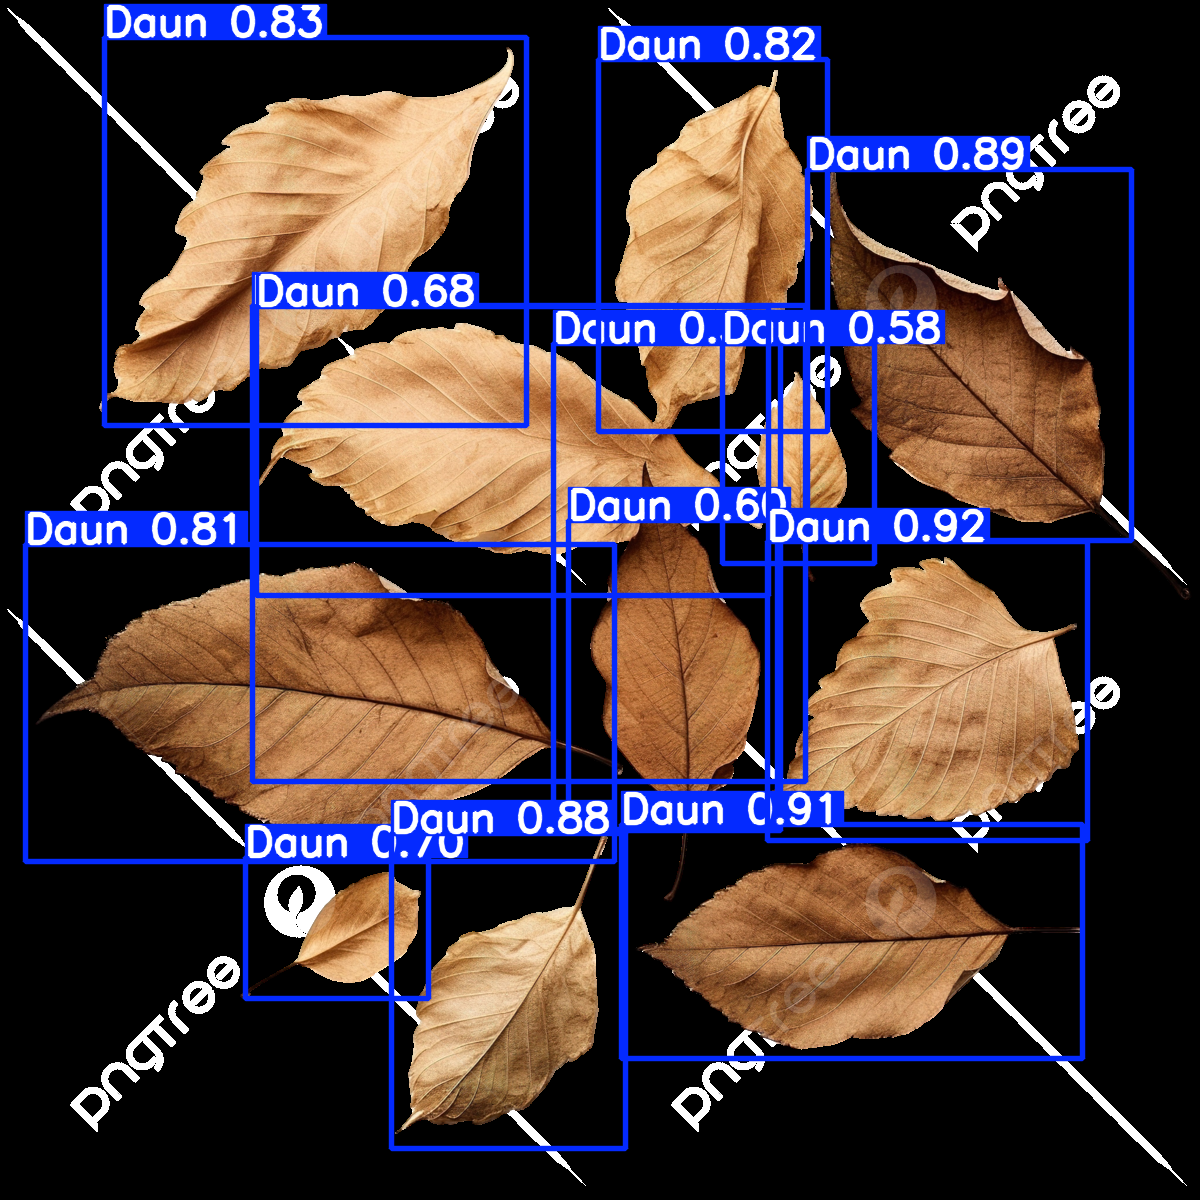

In [14]:
# Predict on an image
results = model.predict(source='/content/dn2.png', conf=0.25)

# Show the result
results[0].show()



image 1/1 /content/st0.jpg: 448x640 1 Styrofoam, 99.8ms
Speed: 6.5ms preprocess, 99.8ms inference, 3.3ms postprocess per image at shape (1, 3, 448, 640)


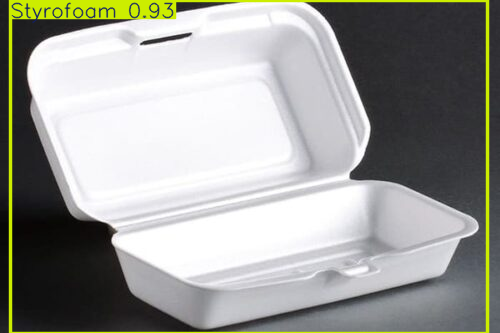

In [19]:
# Predict on an image
results = model.predict(source='/content/st0.jpg', conf=0.25)

# Show the result
results[0].show()



image 1/1 /content/pl.jpg: 448x640 1 Styrofoam, 13.1ms
Speed: 2.8ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


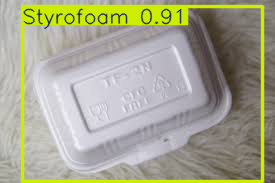

In [20]:
# Predict on an image
results = model.predict(source='/content/pl.jpg', conf=0.25)

# Show the result
results[0].show()


# Export ke format tfjs

In [15]:
model.export(format='tfjs')

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/train5/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (21.5 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx>=1.12.0,<1.18.0', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 9.9s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.18.0...


100%|██████████| 1.11M/1.11M [00:00<00:00, 47.4MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 49.58file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.57...
ONNX: export success ✅ 2.2s, saved as '/content/runs/detect/train5/weights/best.onnx' (42.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.10...
Saved artifact at '/content/runs/detect/train5/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 640, 640, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 14, 8400), dtype=tf.float32, name=None)
Captures:
  133026424619088: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  133026434775376: TensorSpec(shape=(3, 3, 3, 32), dtype=tf.float32, name=None)
  133026424619472: TensorSpec(shape=(32,), dtype=tf.float32, name=None)
  133026424623888: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  133026424623504: TensorSpec(shape=(3, 3, 32, 64), dtype=tf.float32, name=None)
  133026424624464: TensorSpec(shape=(64,), dtype=tf.float32, name=None)
  133026424621200: Te


TensorFlow.js: starting export with tensorflowjs 4.22.0...

TensorFlow.js: output node names: Identity:0
TensorFlow.js: running 'tensorflowjs_converter --input_format=tf_frozen_model  --output_node_names=Identity:0 "/content/runs/detect/train5/weights/best.pb" "/content/runs/detect/train5/weights/best_web_model"'
TensorFlow.js: export success ✅ 8.2s, saved as '/content/runs/detect/train5/weights/best_web_model' (42.8 MB)

Export complete (54.9s)
Results saved to /content/runs/detect/train5/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train5/weights/best_web_model imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train5/weights/best_web_model imgsz=640 data=/content/SapuJagat-8/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train5/weights/best_web_model'

In [16]:
# Ganti path di bawah ini dengan path yang Anda salin
path_ke_folder = '/content/runs/detect/train5/weights/best_web_model'

# Perintah ini akan membuat file zip di direktori utama /content/
!zip -r /content/tfjs_model.zip {path_ke_folder}

  adding: content/runs/detect/train5/weights/best_web_model/ (stored 0%)
  adding: content/runs/detect/train5/weights/best_web_model/group1-shard6of11.bin (deflated 7%)
  adding: content/runs/detect/train5/weights/best_web_model/group1-shard1of11.bin (deflated 11%)
  adding: content/runs/detect/train5/weights/best_web_model/group1-shard9of11.bin (deflated 7%)
  adding: content/runs/detect/train5/weights/best_web_model/group1-shard7of11.bin (deflated 7%)
  adding: content/runs/detect/train5/weights/best_web_model/group1-shard2of11.bin (deflated 7%)
  adding: content/runs/detect/train5/weights/best_web_model/group1-shard3of11.bin (deflated 7%)
  adding: content/runs/detect/train5/weights/best_web_model/group1-shard5of11.bin (deflated 7%)
  adding: content/runs/detect/train5/weights/best_web_model/model.json (deflated 95%)
  adding: content/runs/detect/train5/weights/best_web_model/metadata.yaml (deflated 37%)
  adding: content/runs/detect/train5/weights/best_web_model/group1-shard11of11.

In [17]:
!pip freeze > requirements.txt